#TMD SIDIS

##Specify path to TMD libs

In [1]:
#root='/Users/nobuosato/Dropbox/work/python_TMD/'
root='../../'

##load libraries

In [2]:
import sys,os
sys.path.insert(1,root)
import pylab as py
import numpy as np
%matplotlib inline  
from TMDPDF import TMDPDF
from StrongCoupling import StrongCoupling
from tools import ProgressBar,tex
from DrellYan import DrellYan
from CollinearPDF import Cteq6PDF,ToyPDF
from FF.FF import FragFuncs
from SIDIS import SIDIS

## plot alpha strong

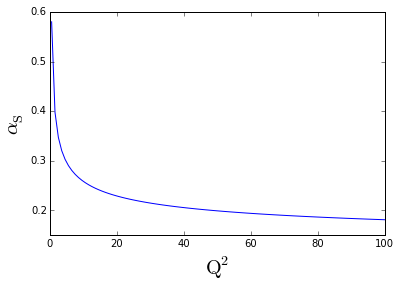

In [3]:
sc = StrongCoupling()
Q2 = np.linspace(.5,100,100)
alphas=[sc.get_alphaS(q2) for q2 in Q2]
ax=py.subplot(111)
ax.plot(Q2,alphas)
ax.set_xlabel(tex('Q^2'),size=20)
ax.set_ylabel(tex('\\alpha_S'),size=20)

##initialize collinear PDF  & FF & SIDIS

In [4]:
CPDF=Cteq6PDF(root)
CFF=FragFuncs(root+'FF/tables/PILO.TAB')
sidis=SIDIS(CPDF,CFF)

## define non-perturbative function for TPDF and TFF

In [5]:
def PDFNP(x,mu2,bT2):
    arg = -0.25*(0.19*np.log(Q2/(1.0)))*bT2
    arg+= -1.0*((0.013*(1-x)**3)/x)*bT2                                          
    return np.exp(arg)

def FFNP(z,mu2,bT2):
    arg = -0.25*(0.19*np.log(Q2/(1.0)))*bT2
    arg+= -(0.2)*bT2                                           
    return np.exp(arg)

sidis.TPDF.D['NP model'] = PDFNP
sidis.TFF.D['NP model'] = FFNP

## W term in bT space

In [6]:
BT=np.linspace(1e-3,5.0,50)

Q2=1.5
z=0.5
x=0.15
s=300.0
y=(Q2)/(x*s)
charge=1
BTW1=[bT*sidis.get_L_bT_space(x,y,z,Q2,bT**2,charge) for bT in BT]

Q2=30.0
z=0.5
x=0.15
s=300.0
y=(Q2)/(x*s)
charge=1
BTW2=[bT*sidis.get_L_bT_space(x,y,z,Q2,bT**2,charge) for bT in BT]

Q2=1.5
z=0.5
x=0.15
s=300.0
y=(Q2)/(x*s)
charge=1
BTW3=[bT*sidis.get_L_bT_space(x,y,z,Q2,bT**2,charge) for bT in BT]

Q2=30.0
z=0.5
x=0.15
s=300.0
y=(Q2)/(x*s)
charge=1
BTW4=[bT*sidis.get_L_bT_space(x,y,z,Q2,bT**2,charge) for bT in BT]

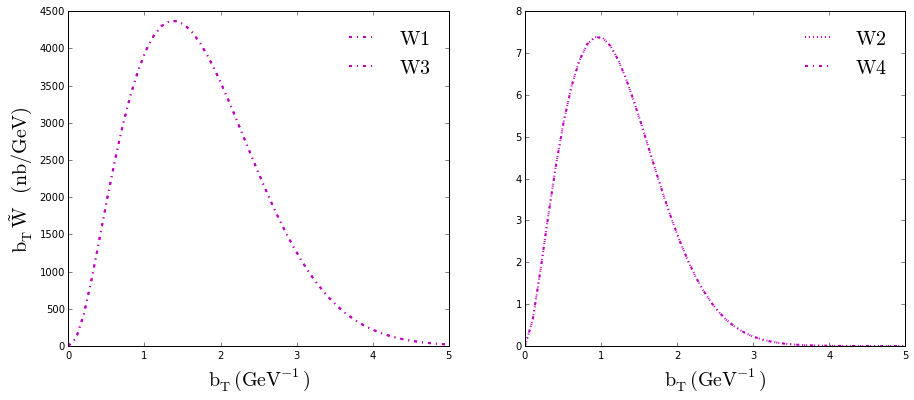

In [7]:
py.figure(figsize=(15,6))

ax=py.subplot(121)
ax.plot(BT,BTW1,'m-.',lw=2,label=tex('W1'))
ax.plot(BT,BTW3,'m-.',lw=2,label=tex('W3'))
ax.set_ylabel(tex('b_T\\tilde{W}\;(nb/GeV)'),size=20)
ax.set_xlabel(tex('b_T(GeV^{-1})'),size=20)
ax.legend(frameon=0,fontsize=20)

ax=py.subplot(122)
ax.plot(BT,BTW2,'m:',lw=2,label=tex('W2'))
ax.plot(BT,BTW4,'m-.',lw=2,label=tex('W4'))
#ax.set_ylabel(tex('b_T\\tilde{W}\;(nb/GeV)'),size=20)
ax.set_xlabel(tex('b_T(GeV^{-1})'),size=20)
ax.legend(frameon=0,fontsize=20)

#py.savefig('plot.pdf')

## W term in qT space:   small qT region 

In [8]:
Q2=15
z=0.5
x=0.15
s=300.0
y=(Q2)/(x*s)
charge=1
qTs=np.linspace(0.1,5.0,40)

In [9]:
# ADAPTIVE GAUSSIAN QUADRATURE TO TEST FFT. COMMENT OUT TO SPEAD UP CODE.
# bar=ProgressBar(qTs.size,'computing with quad')
# W=[]
# cnt=0
# for qT in qTs: 
#    W.append(sidis.get_L(x,y,z,Q2,qT,charge)) 
#     bar.animate(cnt+1)
#    cnt+=1

In [10]:
sidis.setup_hankel(N=70,h=1e-3)
bar=ProgressBar(qTs.size,'computing with FFT ')
W2=[]
cnt=0
for qT in qTs: 
    W2.append(sidis.get_L_FFT(x,y,z,Q2,qT,charge)) 
    bar.animate(cnt+1)
    cnt+=1

[**************************100%********]  computing with FFT   40 of 40 complete


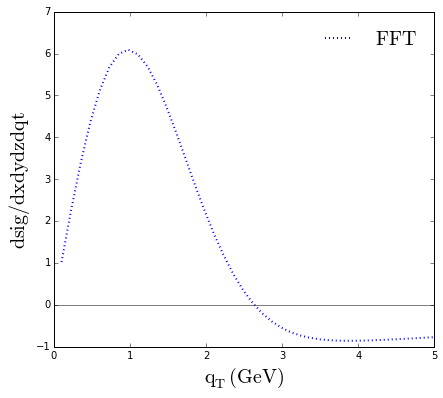

In [13]:
py.figure(figsize=(15,6))
ax=py.subplot(121)
#ax.plot(qTs,W,'r--',lw=2,label=tex('quad'))
ax.plot(qTs,W2,'b:',lw=2,label=tex('FFT'))
ax.set_xlabel(tex('q_T(GeV)'),size=20)
ax.set_ylabel(tex('d sig/ dxdydzdqt'),size=20)
ax.legend(frameon=0,fontsize=20)
ax.axhline(y=0,c='k',alpha=0.5)